In [53]:
import requests
import pandas as pd
import time
import os

# 네이버 API 키 입력
CLIENT_ID = "FrPhJETiD_GG60frzdsE"
CLIENT_SECRET = "vyXafsr746"

def get_news(keyword, display=100, start=1):
    url = "https://openapi.naver.com/v1/search/news.json"

    headers = {
        "X-Naver-Client-Id": CLIENT_ID,
        "X-Naver-Client-Secret": CLIENT_SECRET
    }

    params = {
        "query": keyword,  # 검색어
        "display": display,
        "start": start,
        "sort": "date"  # 최신순
    }

    response = requests.get(url, headers=headers, params=params)
    return response.json().get("items", [])

def collect_news(keywords, pages=3):
    all_news = []

    for kw in keywords:
        print(f"🔍 Collecting: {kw}")

        for page in range(pages):
            start = 1 + page * 100
            items = get_news(kw, start=start)

            for item in items:
                all_news.append({
                    "keyword": kw,
                    "title": item["title"].replace("<b>", "").replace("</b>", ""),
                    "description": item.get("description", ""),
                    "link": item["link"],
                    "pubDate": item["pubDate"]
                })

            time.sleep(0.2)

    return pd.DataFrame(all_news)

# 수집할 키워드
keywords = ["IT", "경제", "정치", "AI", "사회", "국제"]

# 뉴스 수집
df = collect_news(keywords)

# 'data' 디렉토리가 없으면 생성
os.makedirs('data', exist_ok=True)

# CSV 저장
df.to_csv("data/naver_news_raw.csv", index=False, encoding="utf-8-sig")
print("📁 저장 완료: data/naver_news_raw.csv")
print(df.head())

🔍 Collecting: IT
🔍 Collecting: 경제
🔍 Collecting: 정치
🔍 Collecting: AI
🔍 Collecting: 사회
🔍 Collecting: 국제
📁 저장 완료: data/naver_news_raw.csv
  keyword                                              title  \
0      IT  Entertainment industry comes together to honor...   
1      IT    법무법인 선운-日 가와하라 법률사무소 '맞손'…&quot;효율적 법률 서비스 제...   
2      IT             데이터얼라이언스·FPT, 베트남 GPU 활용한 AI 인프라 동맹 결성   
3      IT                         안전보건공단, 공작기계산업협회와 산재 예방 동행   
4      IT  What the Pentagon’s Attack Videos Reveal About...   

                                         description  \
0  “<b>It</b> is heartbreaking to think there is ...   
1  최근 한일 양국 기업 간 교류는 수출, 투자, 프랜차이즈, <b>IT</b>, 제조...   
2  인공지능(AI)과 클라우드 기술에서 협업 기반을 넓히기 위한 움직임으로, 국내 클라...   
3  최근에는 <b>IT</b>기술과 네트워킹을 활용한 융·복합 공작기계로 빠르게 변화되...   
4  attacks on vessels <b>it</b> says are traffick...   

                                                link  \
0  https://m.entertain.naver.com/article/640/0000...   
1  https://n.news.naver.com/mne

In [54]:
import pandas as pd

df = pd.read_csv("data/naver_news_raw.csv", encoding='utf-8-sig')
df.head()

# 데이터 구조 확인
df.info()

# 기초 통계 (문자열 포함)
df.describe(include="all")

df.isnull().sum()

df['title_length'] = df['title'].astype(str).apply(len)
df['desc_length'] = df['description'].astype(str).apply(len)

df[['title_length', 'desc_length']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   keyword      1800 non-null   object
 1   title        1800 non-null   object
 2   description  1800 non-null   object
 3   link         1800 non-null   object
 4   pubDate      1800 non-null   object
dtypes: object(5)
memory usage: 70.4+ KB


,title_length,desc_length
0,76,207
1,47,132
2,38,130
3,26,128
4,70,209


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

!apt-get update -qq
!apt-get install fonts-nanum -qq

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

sns.set(style="whitegrid")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

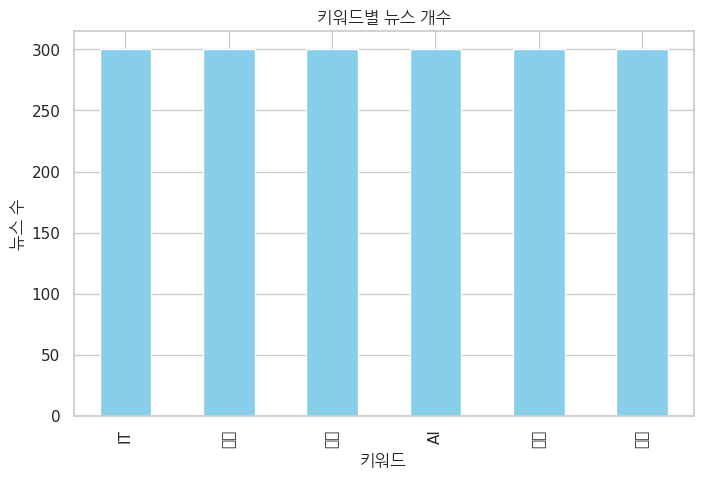

In [56]:
plt.figure(figsize=(8,5))
df['keyword'].value_counts().plot(kind='bar', color='skyblue')
plt.title("키워드별 뉴스 개수", fontproperties=fontprop)
plt.xlabel("키워드", fontproperties=fontprop)
plt.ylabel("뉴스 수", fontproperties=fontprop)
plt.show()

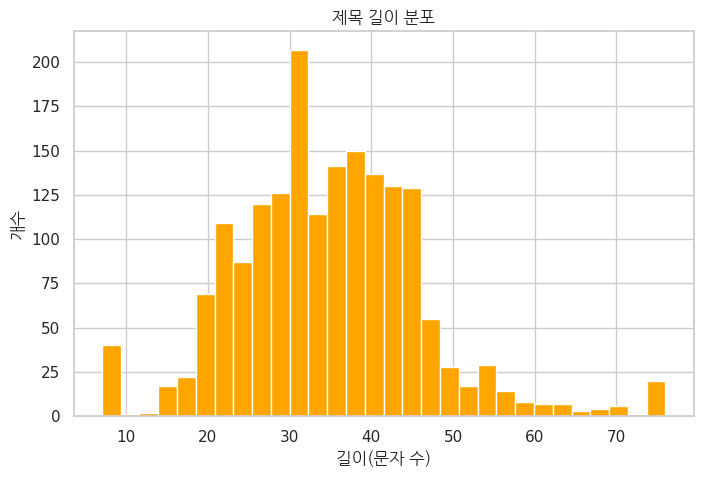

In [57]:
plt.figure(figsize=(8,5))
plt.hist(df['title_length'], bins=30, color='orange')
plt.title("제목 길이 분포", fontproperties=fontprop)
plt.xlabel("길이(문자 수)", fontproperties=fontprop)
plt.ylabel("개수", fontproperties=fontprop)
plt.show()

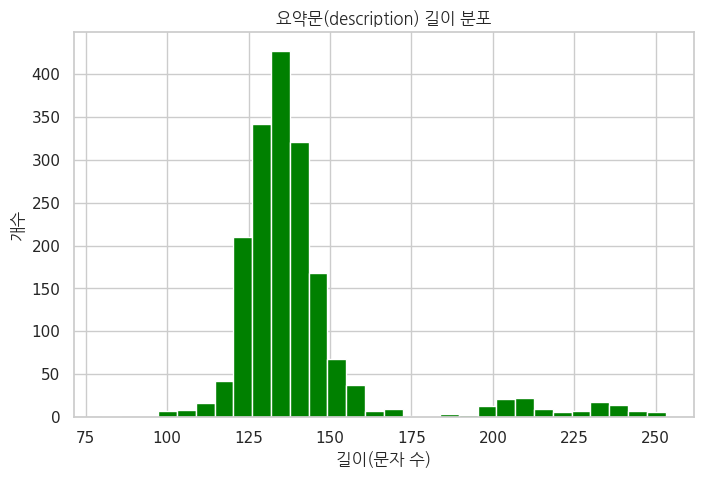

In [58]:
plt.figure(figsize=(8,5))
plt.hist(df['desc_length'], bins=30, color='green')
plt.title("요약문(description) 길이 분포", fontproperties=fontprop)
plt.xlabel("길이(문자 수)", fontproperties=fontprop)
plt.ylabel("개수", fontproperties=fontprop)
plt.show()
